**Task 1** Use the linear least squares method to solve the following problem: In the plane $\mathbb{R}^2$  we have $n$ transmitters at known locations $(p_1 ,q_1), \ldots , (p_n, q_n)$. A receiver can measure the distances $d_1, \ldots, d_n$ from these transmitters. Given those distances, we would like to determine the position of the receiver. In the ideal case the measurements are exact and for each  $i = 1,\ldots, n$ we have an equation

$$(x-p_i)^2 + (y-q_i)^2 = d_i^2.$$

The solution of this system of equations then determines the unknown position of the receiver $(x,y)$.

* The first problem  is that the equations are _not_ linear. But the difference of two consecutive equations is a linear equation. Write down these differences to obtain a system of $n-1$ linear equations.
* Write the matrix $A \in \mathbb{R}^{(n-1)\times 2}$ of the system and the corresponding right-hand side $\mathbf{b} \in \mathbb{R}^{n-1}$. Note that the measurements are (almost surely) not exact which means that the system $A \mathbf{x} = \mathbf{b}$ (almost surely) has no solution.
* Find the least squares solution to $A \mathbf{x} = \mathbf{b}$. Write a _Julia_ function `receiver([..., (pi, qi), ...], [di])` that finds the position `(x, y)` of the receiver given transmitter positions  `(pi, qi)` and distances `di`. (The positions `(pi, qi)` are presented as a vector of 2-tuples and the distances `di` are given as a vector of floats. The result should be a 2-tuple `(x, y)`. Follow these specifications strictly!)

min|Ax-b| = 5.874748045952207e-16


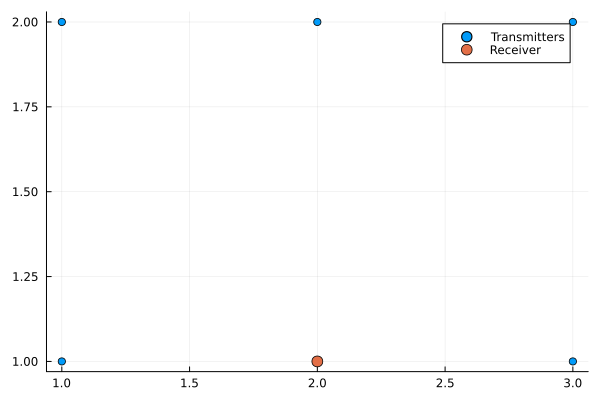

[1.9999999999999998, 1.0000000000000002]
GREAT SUCCESS!!!


In [3]:
using Plots
using LinearAlgebra
"""
(x, y) = receiver, we have positions of transmitters saved in pq of the form of a 2tuple of length n, 
         and in d we have distances from the receiver to these transmitters. The function receiver aproximates
         the location of the receiver using the least squares method, it returns the position as a pair (x,y)
"""
function receiver(pq, d)
    n = length(pq);
    A = [pq[i][k] - pq[i+1][k] for i in 1:(n-1), k in 1:2]
    b = [(d[i+1]^2 - d[i]^2 + pq[i][1]^2 - pq[i+1][1]^2 + pq[i][2]^2 - pq[i+1][2]^2)/2 for i in 1:n-1];
    x = A\b
    residual = norm(A*x - b)
    println("min|Ax-b| = ", residual)
    #OPTIONAL RISANJE#
    xs = [p[1] for p in pq];
    ys = [p[2] for p in pq];
    s = scatter(xs, ys, label="Transmitters")
    scatter!(s, [x[1]], [x[2]], label="Receiver", markersize=6)
    display(s)
    ##################
    return x
end

test = receiver([(1,1), (1,2), (2,2), (3,2), (3,1)], [1, sqrt(2), 1, sqrt(2), 1]);
println(test)
println("GREAT SUCCESS!!!")

**Task 2** The system of equations
$$x - y + z - w = 1,$$
$$x + y - z - w = 3.$$
determines a two-dimensional plane in $\mathbb{R}^4$. Let $T(0,-1,-1,2)$. Our objective is to find the point on this plane which is closest to $T$.

* Write the matrix $A$ and the right-hand side $\mathbf{b}$ of the system above.
* Evaluate $A^+$. (By hand and with _Julia_. Note that this is simple since $A$ has full rank).
* Show that $P = I - A^+ A$ is a matrix of an orthogonal projection, meaning that $P^2 = P$ and $P^\mathsf{T} = P$. Onto which subspace does it project?
* Express and compute the solution (to our objective) using $A^+$.
* Write a _Julia_ function `projection(A, b, T)`, which returns the projection of the point $T$ onto the hyperplane defined by the system $A \mathbf{x} = \mathbf{b}$. 

In [4]:
A = [1 -1 1 -1;
     1 1 -1 -1]

2×4 Matrix{Int64}:
 1  -1   1  -1
 1   1  -1  -1

In [5]:
MPA = pinv(A)

4×2 Matrix{Float64}:
  0.25   0.25
 -0.25   0.25
  0.25  -0.25
 -0.25  -0.25

In [6]:
I = [1 0 0 0; 
     0 1 0 0; 
     0 0 1 0; 
     0 0 0 1];
P = I - MPA*A;
P2 = P*P;
println(isapprox(P, P2));
PT = transpose(P);
println(isapprox(P, PT));
b = [1; 3];
x = MPA*b

true
true


4-element Vector{Float64}:
  0.9999999999999997
  0.49999999999999967
 -0.49999999999999967
 -0.9999999999999997

In [ ]:
function projection(A, b, T)
    MPA = pinv(A);
    x = T - MPA*(A*T - b)
    return x
end
rez = projection(A, b, [0, -1, -1, 2])


4-element Vector{Float64}:
  1.9999999999999996
 -0.5000000000000004
 -1.4999999999999996
  4.440892098500626e-16